In [114]:
import pandas as pd
import numpy as np

In [115]:
dataset = pd.read_csv('labeled_data.csv')

In [116]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [117]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [118]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [119]:
 dataset["labels"]=dataset["class"].map({0: "Hate Speech",1:"Offensive language",2:"No hate or offensive language"})

In [120]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive language


In [121]:
data=dataset[["tweet","labels"]]

In [122]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,youu got wild bitches tellin you lies,Offensive language


In [123]:
import re
import nltk
import string

In [124]:
import nltk
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [125]:
#Importing  stop words 
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [126]:
# Importing stemming
stemmer=nltk.SnowballStemmer("english")

In [127]:
#data cleaning
def clean_data(text):
  text=str(text).lower()
  text=re.sub('https?://\S+|www\.S+',' ',text)
  text= re.sub('\[.*?\]','',text)
  text= re.sub('<.*?>+','',text)
  text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
 #stop words removal
  text= [word for word in text.split(' ') if word not in stopwords]
  text=" ".join(text)
  #stemming the text
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text



In [128]:
data["tweet"]=data["tweet"].apply(clean_data)

C:\Users\kanis\AppData\Local\Temp\ipykernel_12156\2823468588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean_data)


In [129]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No hate or offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive language
3,rt cganderson vivabas look like tranni,Offensive language
4,rt shenikarobert shit hear might true might f...,Offensive language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive language
24779,youv gone broke wrong heart babi drove redneck...,No hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive language
24781,youu got wild bitch tellin lie,Offensive language


In [130]:
X=np.array(data["tweet"])
y=np.array(data["labels"])

In [131]:
X

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll  '],
      dtype=object)

In [132]:
y

array(['No hate or offensive language', 'Offensive language',
       'Offensive language', ..., 'Offensive language',
       'Offensive language', 'No hate or offensive language'],
      dtype=object)

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [134]:
cv=CountVectorizer()
X= cv.fit_transform(X)

In [135]:
X

<24783x25692 sparse matrix of type '<class 'numpy.int64'>'
	with 197863 stored elements in Compressed Sparse Row format>

In [136]:
X_train,X_test,y_train,y_test= train_test_split(X,y,
                                                  test_size=0.33,
                                                  random_state=42)

In [137]:
X_train

<16604x25692 sparse matrix of type '<class 'numpy.int64'>'
	with 132620 stored elements in Compressed Sparse Row format>

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
dt= DecisionTreeClassifier()

In [140]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [141]:
y_pred=dt.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[ 158,   44,  263],
       [  31, 1152,  196],
       [ 222,  240, 5873]], dtype=int64)

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

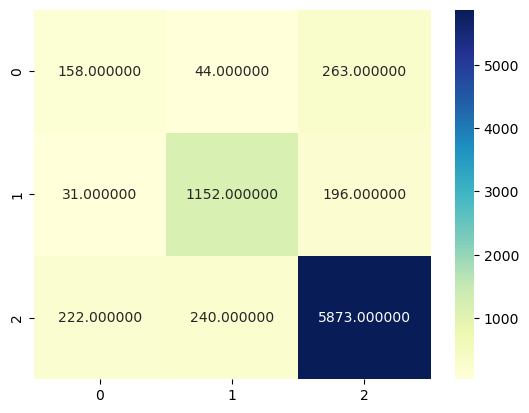

In [144]:
sns.heatmap(cm,annot= True,fmt="f",cmap="YlGnBu")

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8782247218486368

In [146]:
sample="Bruh im tired of niggas retweetin Miley Cyrus naked that bitch aint no types of bad"
sample= clean_data(sample)

In [147]:
sample=cv.transform([sample_list]).toarray()

In [148]:
dt.predict(sample)

array(['Offensive language'], dtype=object)